
# Linear Regression

National Institutes of Health (NIH) has developed a mobile phone application and a website to enable citizens to make appointments and pay fees for vaccines, especially COVID vaccines, as well as other vaccines such as hepatitis B and meningitis. We want to decide which of these two platforms should be further developed to better reach citizens.

## Imports


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

We will use the NIH_Customers.csv data:

 Avg. Session Length: Average session length of in-person sessions in the hospital.
 Time on App: Average time spent on the App (in minutes).
 Time on Website: Average time spent on the Website (in minutes).
 Yearly social security fee: The amount each patient pays yearly.



# Data Examination

In [5]:
data = pd.read_csv("NIH_Customers.csv")

## Data Visualization



<Axes: xlabel='Time on Website', ylabel='Yearly Social Security Fee'>

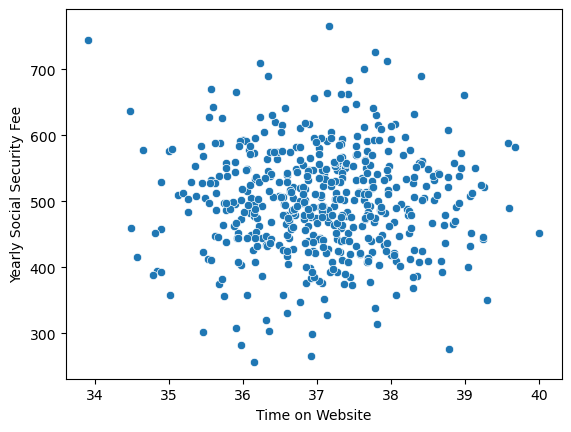

In [17]:
sns.scatterplot(data = data, x = "Time on Website", y = "Yearly Social Security Fee")
#The correlation does not make sense.

In [ ]:
#We are examining which columns show a meaningful correlation in the pair plot below.

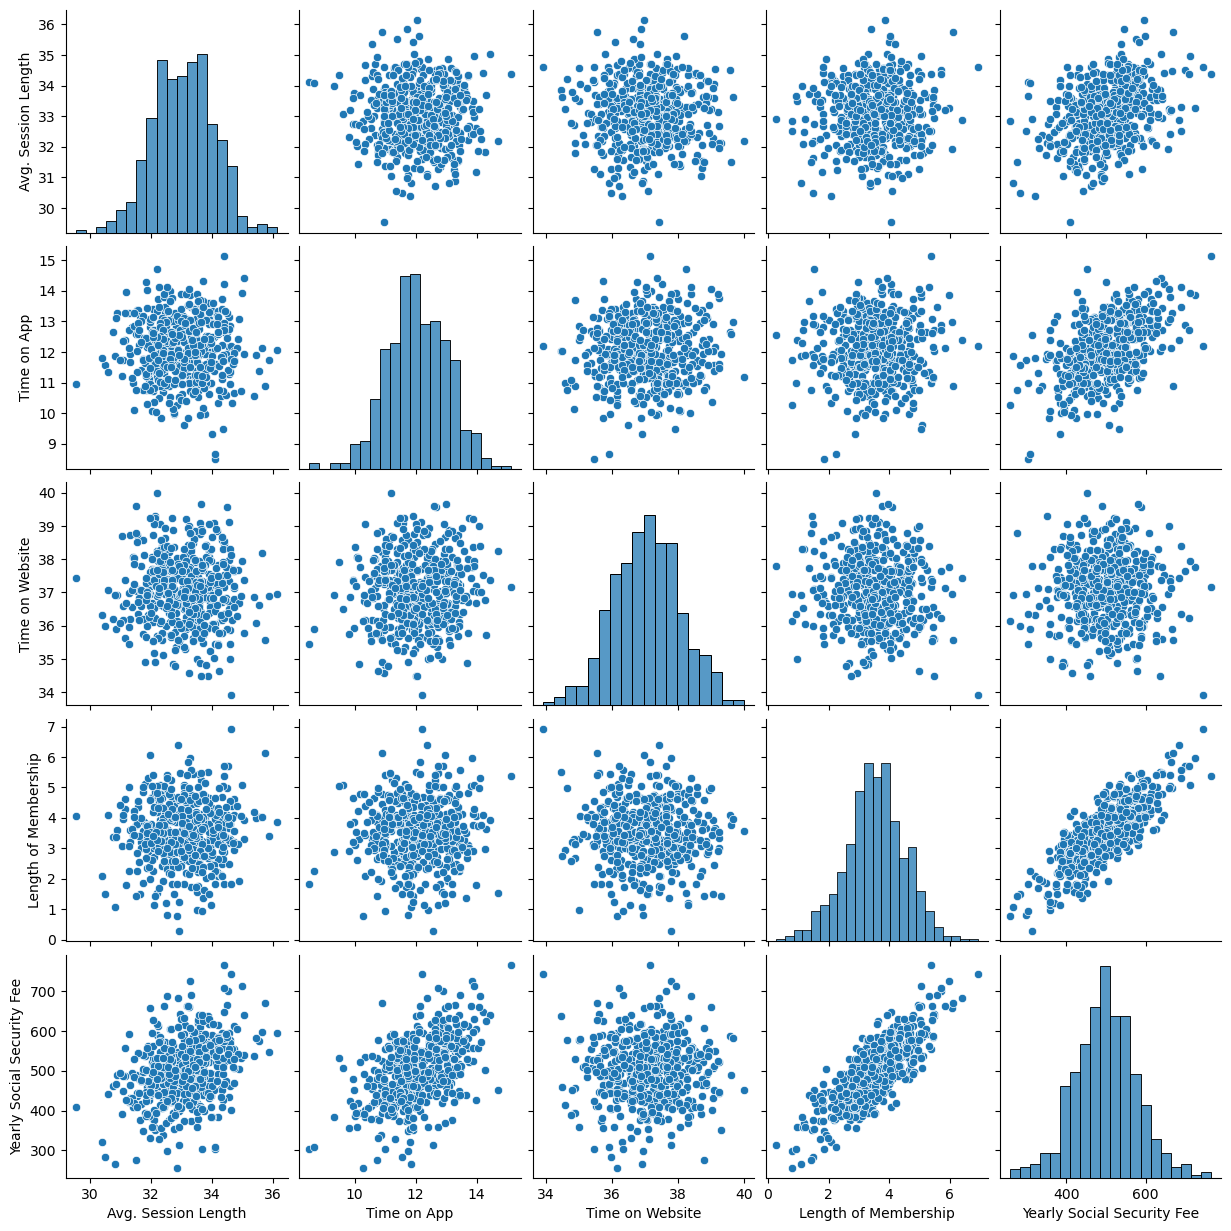

In [19]:
sns.pairplot(data)

In [ ]:
# There is a clear, positive correlation between Length of Membership and Yearly Social Security Fee.
# There also seems to be a weak but positive correlation between Time on App and Yearly Social Security Fee.


## Creating Training and Testing Data

Let X (independent variables) include all the numerical values in the NIH data, and let y (dependent variable) be the "Yearly Social Security Fee" column.



In [20]:
data.columns

Index(['Email', 'Avg. Session Length', 'Time on App', 'Time on Website',
       'Length of Membership', 'Yearly Social Security Fee'],
      dtype='object')

In [22]:
X = data[["Avg. Session Length", "Time on App", "Time on Website", "Length of Membership"]]
y = data["Yearly Social Security Fee"]

## We split the data into training and testing sets using sklearn.

In [27]:
from sklearn.model_selection import train_test_split
X_train,X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=99)

## Training 

** Import LinearRegression from sklearn.linear_model **

In [30]:
from sklearn.linear_model import LinearRegression

## We create a LinearRegression() model named lm.

In [31]:
lm = LinearRegression()

## We create the regression model using only the training data

In [32]:
model = lm.fit(X_train,y_train)

## We show the coefficients of the model.

In [34]:
coeff_df = pd.DataFrame(lm.coef_, X.columns, columns=["Coefficient"])
coeff_df

,Coefficient
Avg. Session Length,26.043151
Time on App,38.771760
Time on Website,0.629537
Length of Membership,61.668494


## Making Predictions with the Test Data

 Now that we have created our model, we will evaluate its performance.

In [35]:
predictions = lm.predict(X_test)

## We plot a scatterplot between the actual test values and the predicted test values.

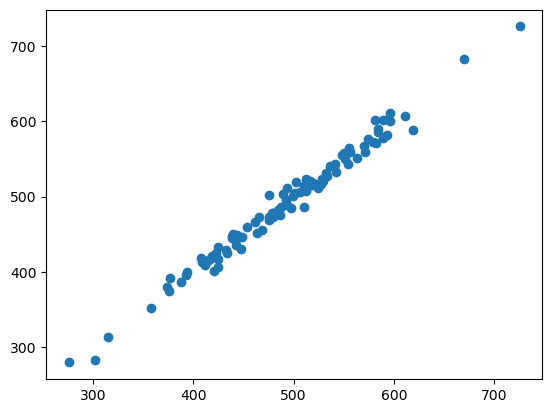

In [37]:
plt.scatter(y_test,predictions)

## Model Evaluation


In [39]:
from sklearn import metrics
print("MAE : ", metrics.mean_absolute_error(y_test,predictions))
print("MSE:" , metrics.mean_squared_error(y_test,predictions))
print ("R*2: ", metrics.r2_score(y_test,predictions))

MAE :  7.292825922925943
MSE: 90.85550292399012
R*2:  0.9848138099814456


## Residuals


/tmp/ipykernel_47304/5727784.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot((y_test-predictions), bins=50)


<Axes: xlabel='Yearly Social Security Fee', ylabel='Density'>

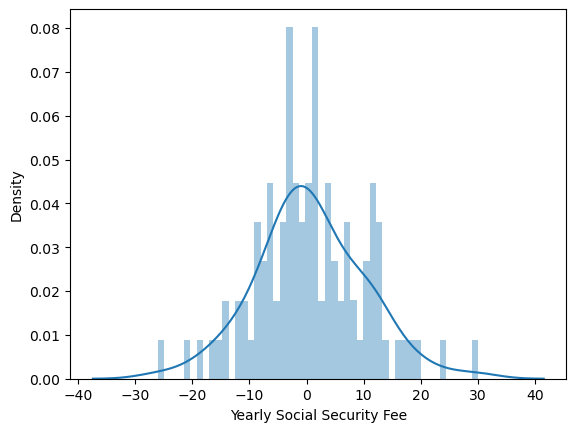

In [41]:
sns.distplot((y_test-predictions), bins=50)

## NIH cannot decide whether to focus more on the phone app or the website!

## What do you think NIH should do?

In [2]:
# Looking at the coefficient values:
# Time on App Coefficient: 38.771760
# Time on Website Coefficient: 0.629537
# Therefore, NIH should focus more on developing the app.
# Because if users spend one more hour on the app, the yearly revenue increases by approximately 38.77 units.
# However, an increase of one hour on the website results in only a 0.63 unit increase in revenue, which is very little.